In [58]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox 
%matplotlib inline
#import seaborn as sns
#import pmdarima as pmd
from statsmodels.tsa.arima_model import ARIMA,ARMA

In [2]:
df = pd.read_csv("project.csv", thousands = ',')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec, 2020","40,270.72","35,048.15","40,279.29","34,145.13",0,14.92
1,"Nov, 2020","35,042.14","30,527.69","35,814.18","30,364.15",0,14.78
2,"Oct, 2020","30,530.69","26,831.76","30,530.69","26,830.59",0,13.76
3,"Sep, 2020","26,837.42","25,327.13","26,862.21","25,327.13",0,5.96
4,"Aug, 2020","25,327.13","24,710.93","25,334.11","24,690.75",0,2.57
...,...,...,...,...,...,...,...
129,"Mar, 2010","25,966.25","22,980.04","26,464.85","22,813.64",0,12.97
130,"Feb, 2010","22,985.00","22,822.12","24,317.91","22,698.09",0,1.73
131,"Jan, 2010","22,594.90","21,000.09","22,921.46","20,838.89",0,8.49
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dropna(inplace = True)

In [4]:
df['Date']

0      Dec, 2020
1      Nov, 2020
2      Oct, 2020
3      Sep, 2020
4      Aug, 2020
         ...    
127    May, 2010
128    Apr, 2010
129    Mar, 2010
130    Feb, 2010
131    Jan, 2010
Name: Date, Length: 132, dtype: object

In [5]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
127,"May, 2010","26,183.21","26,430.04","27,913.71","25,573.66",0,-1.02
128,"Apr, 2010","26,453.20","25,966.76","28,426.93","25,359.33",0,1.88
129,"Mar, 2010","25,966.25","22,980.04","26,464.85","22,813.64",0,12.97
130,"Feb, 2010","22,985.00","22,822.12","24,317.91","22,698.09",0,1.73
131,"Jan, 2010","22,594.90","21,000.09","22,921.46","20,838.89",0,8.49


In [6]:
df['Date']= pd.to_datetime(df['Date'], format= "%b, %Y")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-12-01,"40,270.72","35,048.15","40,279.29","34,145.13",0,14.92
1,2020-11-01,"35,042.14","30,527.69","35,814.18","30,364.15",0,14.78
2,2020-10-01,"30,530.69","26,831.76","30,530.69","26,830.59",0,13.76
3,2020-09-01,"26,837.42","25,327.13","26,862.21","25,327.13",0,5.96
4,2020-08-01,"25,327.13","24,710.93","25,334.11","24,690.75",0,2.57
...,...,...,...,...,...,...,...
127,2010-05-01,"26,183.21","26,430.04","27,913.71","25,573.66",0,-1.02
128,2010-04-01,"26,453.20","25,966.76","28,426.93","25,359.33",0,1.88
129,2010-03-01,"25,966.25","22,980.04","26,464.85","22,813.64",0,12.97
130,2010-02-01,"22,985.00","22,822.12","24,317.91","22,698.09",0,1.73


In [7]:
df['Price'] = df["Price"].str.replace(",", "")


In [8]:
df.set_index('Date', inplace = True)

In [9]:
df = df.loc[:, "Price"]

In [10]:
df

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2010-05-01    26183.21
2010-04-01    26453.20
2010-03-01    25966.25
2010-02-01    22985.00
2010-01-01    22594.90
Name: Price, Length: 132, dtype: object

In [11]:
df = pd.to_numeric(df).astype('float64')

<AxesSubplot:xlabel='Date'>

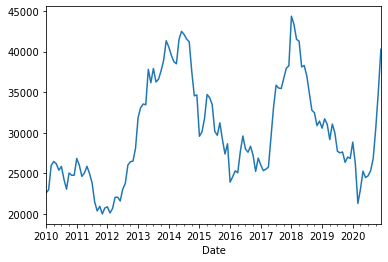

In [12]:
df.plot()


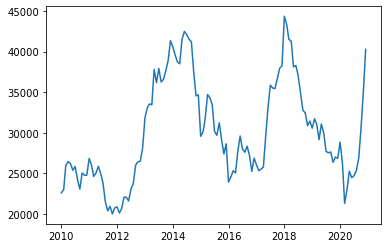

In [13]:
plt.plot(df)

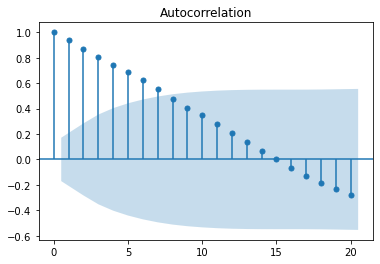

In [14]:
fig = tsaplots.plot_acf(df,lags = 20)

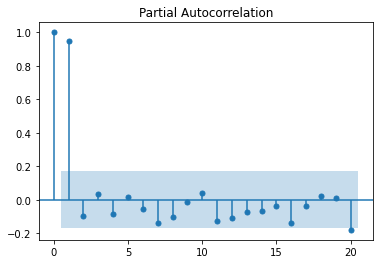

In [15]:
fig1 = tsaplots.plot_pacf(df,lags = 20)

In [16]:
sm.tsa.acf(df)

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  9.38207371e-01,  8.69812266e-01,  8.08978401e-01,
        7.44459043e-01,  6.84608009e-01,  6.24597465e-01,  5.53961572e-01,
        4.77769471e-01,  4.07039812e-01,  3.46743724e-01,  2.80783237e-01,
        2.09525570e-01,  1.38247102e-01,  6.66029617e-02,  3.05614541e-04,
       -6.68706405e-02, -1.30128088e-01, -1.84195719e-01, -2.30654766e-01,
       -2.82688579e-01, -3.19532844e-01, -3.56154406e-01, -3.93565939e-01,
       -4.18009763e-01, -4.37028928e-01, -4.48143937e-01, -4.46828398e-01,
       -4.34820644e-01, -4.21540537e-01, -4.02041302e-01, -3.69694368e-01,
       -3.35524144e-01, -2.94497064e-01, -2.50050535e-01, -2.12051637e-01,
       -1.82973011e-01, -1.38645171e-01, -9.52928055e-02, -5.31107684e-02,
       -4.64885610e-03])

In [17]:
#sns.set(rc={'figure.figsize':(11, 4)})

In [18]:
df1 = df.diff().dropna()
df1

Date
2020-11-01   -5228.58
2020-10-01   -4511.45
2020-09-01   -3693.27
2020-08-01   -1510.29
2020-07-01    -633.40
               ...   
2010-05-01     799.07
2010-04-01     269.99
2010-03-01    -486.95
2010-02-01   -2981.25
2010-01-01    -390.10
Name: Price, Length: 131, dtype: float64

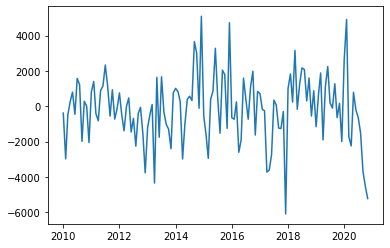

In [19]:
df_diff = df.diff().dropna()
plt.plot(df_diff)

In [20]:

df_diff

Date
2020-11-01   -5228.58
2020-10-01   -4511.45
2020-09-01   -3693.27
2020-08-01   -1510.29
2020-07-01    -633.40
               ...   
2010-05-01     799.07
2010-04-01     269.99
2010-03-01    -486.95
2010-02-01   -2981.25
2010-01-01    -390.10
Name: Price, Length: 131, dtype: float64

In [21]:
df

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2010-05-01    26183.21
2010-04-01    26453.20
2010-03-01    25966.25
2010-02-01    22985.00
2010-01-01    22594.90
Name: Price, Length: 132, dtype: float64

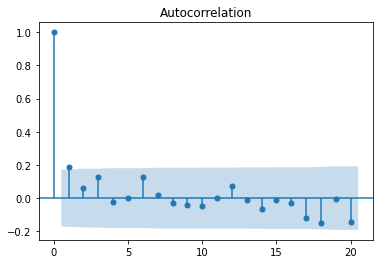

In [22]:
fig = tsaplots.plot_acf(df_diff,lags = 20)

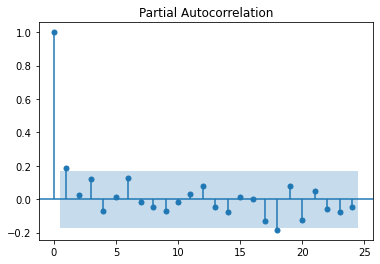

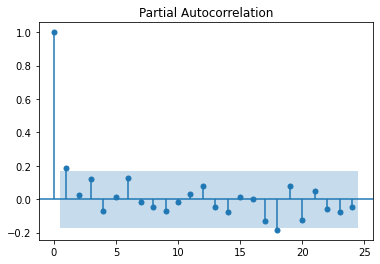

In [23]:
tsaplots.plot_pacf(df_diff, lags = 24)


<AxesSubplot:xlabel='Date'>

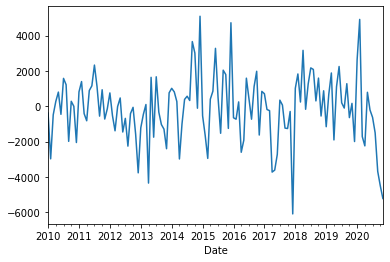

In [24]:

df_diff.plot()

In [25]:
df_diff.head()

Date
2020-11-01   -5228.58
2020-10-01   -4511.45
2020-09-01   -3693.27
2020-08-01   -1510.29
2020-07-01    -633.40
Name: Price, dtype: float64

In [26]:
sm.tsa.acf(df_diff)

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  1.88065156e-01,  6.14421207e-02,  1.27780730e-01,
       -2.21885810e-02,  2.85640131e-03,  1.27727102e-01,  1.78598310e-02,
       -3.02170659e-02, -4.39630659e-02, -5.02950401e-02, -8.96642692e-04,
        7.57479447e-02, -1.30990555e-02, -6.72538117e-02, -1.27969445e-02,
       -2.84195426e-02, -1.19650235e-01, -1.52323057e-01, -3.58900316e-03,
       -1.44914359e-01, -3.81024745e-02, -2.50502200e-02, -1.08104999e-01,
       -7.96533892e-02, -8.98833142e-02, -1.65873491e-01, -1.04957722e-01,
       -6.34740243e-02, -1.27708212e-01, -1.49594519e-01, -1.04703633e-02,
       -1.13165320e-01, -4.13112466e-02,  2.53943306e-02,  9.41127848e-02,
        2.29869612e-02,  3.36002617e-02,  4.51132165e-02, -4.50032950e-02,
        1.11195845e-01])

In [27]:
df.to_csv(r'/home/tambarie/Downloads/New_data.csv')

In [28]:
result = adfuller(df)

In [29]:
result

(-1.958389960515535,
 0.3051102087225221,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 2100.47750785079)

In [30]:
df.describe()

count      132.000000
mean     30043.754318
std       6255.082887
min      20003.370000
25%      25296.620000
50%      28488.825000
75%      34896.872500
max      44343.650000
Name: Price, dtype: float64

In [31]:
print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Value:')
for key, value in result[4].items():
    #print('\t%s: %.3f' %(key, value))
    print(f'{key}   {value}')

ADF statistic: -1.958389960515535
p-value: 0.3051102087225221
Critical Value:
1%   -3.4816817173418295
5%   -2.8840418343195267
10%   -2.578770059171598


In [32]:
result1 = adfuller(df_diff)

In [33]:
print(f'ADF statistic: {result1[0]}')
print(f'p-value: {result1[1]}')
print(f'Critical Value:')
for key, value in result1[4].items():
    print('\t%s: %.3f' %(key, value))
    

ADF statistic: -9.633454053054194
p-value: 1.5894425405306493e-16
Critical Value:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [34]:





df_diff2 = df_diff.diff().dropna()

In [35]:
result2 = adfuller(df_diff2)

In [36]:
print(f'ADF statistic: {result2[0]}')
print(f'p-value: {result2[1]}')
print(f'Critical Value:')
for key, value in result2[4].items():
    print('\t%s: %.3f' %(key, value))
    

ADF statistic: -8.845659557435312
p-value: 1.6234006108964766e-14
Critical Value:
	1%: -3.484
	5%: -2.885
	10%: -2.579


<AxesSubplot:xlabel='Date'>

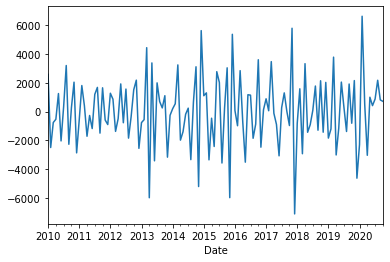

In [37]:
df_diff2.plot()

<AxesSubplot:xlabel='Date'>

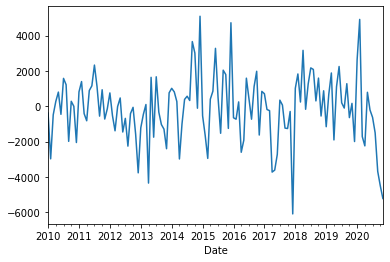

In [38]:
df_diff.plot()

In [39]:
#df.plot(linewidth=0.5)

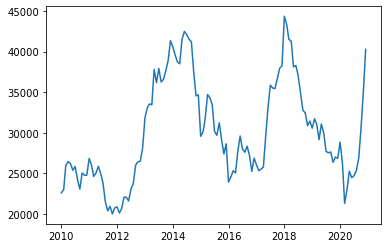

In [40]:
plt.plot(df)

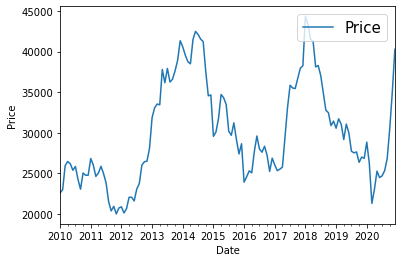

In [41]:
fig = df.plot()
fig.set_ylabel('Price')
fig.legend(loc = 'upper right', fontsize =15)

In [42]:
df

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2010-05-01    26183.21
2010-04-01    26453.20
2010-03-01    25966.25
2010-02-01    22985.00
2010-01-01    22594.90
Name: Price, Length: 132, dtype: float64

In [43]:
from statsmodels.tsa.arima_model import ARIMA


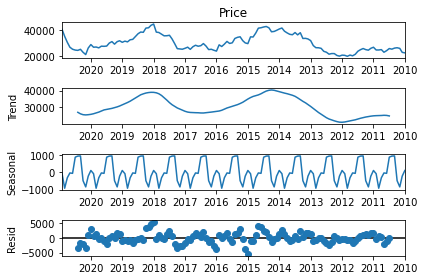

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period=12)
decomposition.plot()
plt.show()

In [45]:

df_diff = df.diff().diff(12).dropna()
df_diff.plot

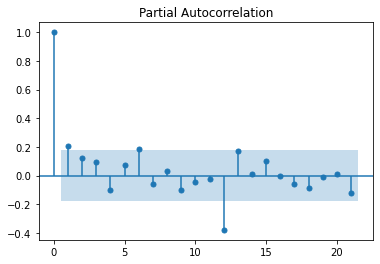

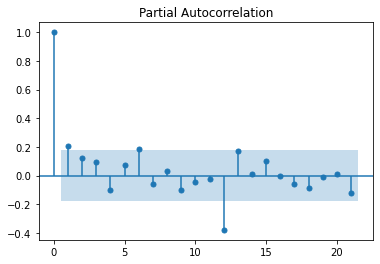

In [46]:
tsaplots.plot_pacf(df_diff)


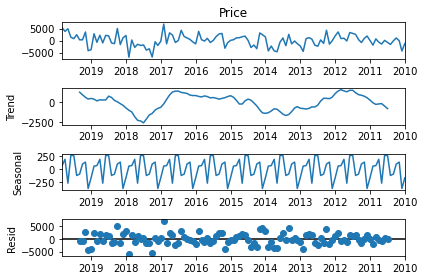

In [47]:


decomposition = seasonal_decompose(df_diff, period=12)
decomposition.plot()
plt.show()

In [48]:
df

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2010-05-01    26183.21
2010-04-01    26453.20
2010-03-01    25966.25
2010-02-01    22985.00
2010-01-01    22594.90
Name: Price, Length: 132, dtype: float64

In [49]:
n = 12
forecast, err , ci = model_fit.forecast(steps = n)
df_forecast = pd.DataFrame({'forecast': forecast}, index = pd.date_range(start = '2021-01-01', periods = n, freq = 'MS'))

NameError: name 'model_fit' is not defined

In [50]:
df_forecast

NameError: name 'df_forecast' is not defined

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but i

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  132
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1179.522
Date:                            Mon, 07 Jun 2021   AIC                           2371.045
Time:                                    21:58:47   BIC                           2388.341
Sample:                                         0   HQIC                          2378.073
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1254.1133   1959.593      0.640      0.522   -2586.619    5094.846
ar.L1          0.9759      0.035   

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but i

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1084.821
Date:                            Mon, 07 Jun 2021   AIC                           2181.642
Time:                                    16:24:10   BIC                           2198.317
Sample:                                         0   HQIC                          2188.413
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -64.0569    140.030     -0.457      0.647    -338.511     210.397
ar.L1         -0.8455      1.760   

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but i

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1084.821
Date:                            Mon, 07 Jun 2021   AIC                           2181.642
Time:                                    17:54:49   BIC                           2198.317
Sample:                                         0   HQIC                          2188.413
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -64.0569    140.030     -0.457      0.647    -338.511     210.397
ar.L1         -0.8455      1.760   

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


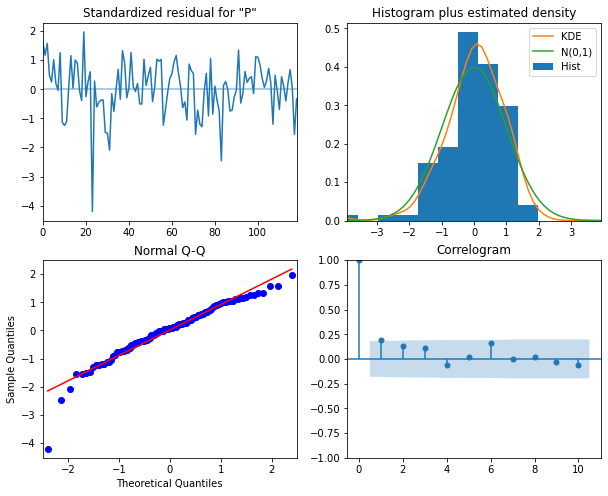

In [54]:
results.plot_diagnostics(figsize = (10,8))
plt.show()


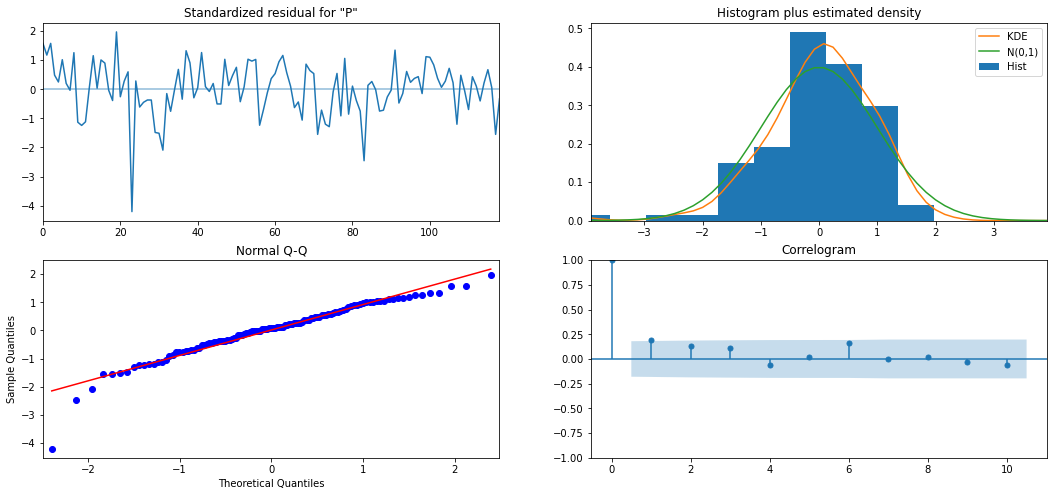

In [55]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [116]:
results.fittedvalues

Date
2019-11-01      30.860762
2019-10-01    1167.719467
2019-09-01     844.343051
2019-08-01    1078.560600
2019-07-01     322.541515
                 ...     
2010-05-01    -917.846219
2010-04-01    -322.359420
2010-03-01     479.113097
2010-02-01    -525.717611
2010-01-01   -1074.779731
Length: 119, dtype: float64

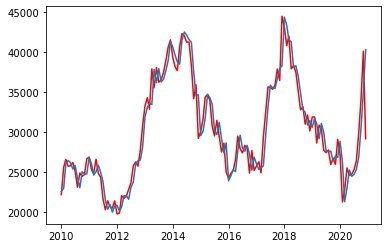

In [133]:
plt.plot(results.fittedvalues, color='red')
plt.plot(df)

In [134]:
results.fittedvalues


Date
2020-12-01    29159.607309
2020-11-01    40088.711452
2020-10-01    34079.996488
2020-09-01    29913.768933
2020-08-01    26391.878685
                  ...     
2010-05-01    25780.952359
2010-04-01    25730.920184
2010-03-01    26595.322377
2010-02-01    25593.115627
2010-01-01    22185.109148
Length: 132, dtype: float64

In [59]:
pred = results.forecast(start= pd.to_datetime('2020-12-01'), end = pd.to_datetime('2021-12-01'), dynamic=False)

TypeError: predict() got multiple values for keyword argument 'start'

In [ ]:
forecast


In [ ]:

plt.plot(df)
plt.plot(pred, color = 'red')

In [60]:
pred


NameError: name 'pred' is not defined

<AxesSubplot:xlabel='Date'>

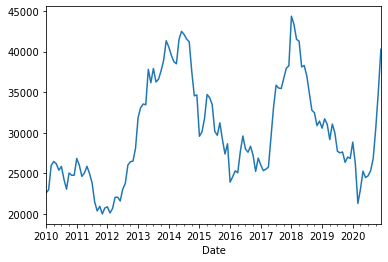

In [61]:
df.plot()


In [135]:
forecast = results.forecast(12)


/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [124]:
forecast = pd.to_numeric(forecast).astype('float64')
forecast.set_index(  start= pd.to_datetime('2020-12-01') )

AttributeError: 'Series' object has no attribute 'set_index'

In [ ]:
pd.DataFrame(forecast).set_index(pd.to_datetime('2020-12-01','2021-01-01','2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01') )

<AxesSubplot:>

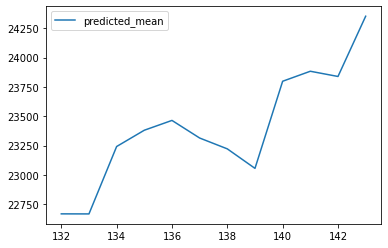

In [136]:
pd.DataFrame(forecast).plot()


In [137]:
forecast

132    22669.605396
133    22669.111975
134    23242.595036
135    23381.229899
136    23464.676417
137    23314.957762
138    23222.634176
139    23056.668722
140    23797.976321
141    23883.086086
142    23838.629847
143    24351.145502
Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

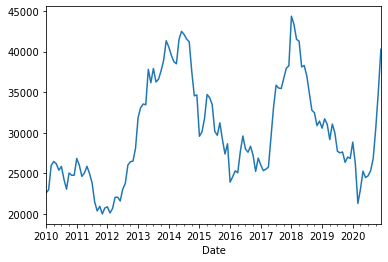

In [98]:
df.plot()

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<function matplotlib.pyplot.show(close=None, block=None)>

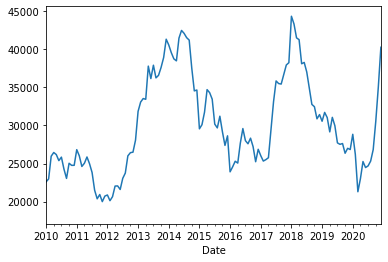

In [64]:
df.plot()
plt.plot(results.forecast(12),color='red')
plt.show

In [65]:
results.predict()

Date
2020-12-01      -57.531219
2020-11-01    40012.875562
2020-10-01    35177.462060
2020-09-01    30341.464496
2020-08-01    26904.627364
                  ...     
2010-05-01    25675.429840
2010-04-01    24857.065992
2010-03-01    25830.867608
2010-02-01    26662.028107
2010-01-01    23372.455798
Name: predicted_mean, Length: 132, dtype: float64

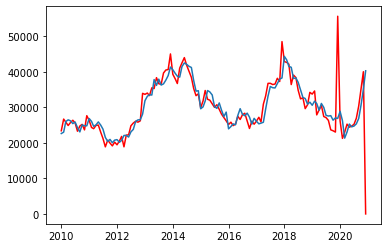

In [119]:
plt.plot(results.fittedvalues, color='red')
plt.plot(df)

In [120]:
results.fittedvalues

Date
2020-12-01      -57.531219
2020-11-01    40012.875562
2020-10-01    35177.462060
2020-09-01    30341.464496
2020-08-01    26904.627364
                  ...     
2010-05-01    25675.429840
2010-04-01    24857.065992
2010-03-01    25830.867608
2010-02-01    26662.028107
2010-01-01    23372.455798
Length: 132, dtype: float64

In [68]:
df 

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2010-05-01    26183.21
2010-04-01    26453.20
2010-03-01    25966.25
2010-02-01    22985.00
2010-01-01    22594.90
Name: Price, Length: 132, dtype: float64

In [102]:
df-results.fittedvalues

Date
2020-12-01    10466.336730
2020-11-01    -4973.813565
2020-10-01    -4399.624673
2020-09-01    -3704.987099
2020-08-01    -1623.389102
                  ...     
2010-05-01      180.894543
2010-04-01      828.624970
2010-03-01     -515.079429
2010-02-01    -2721.786671
2010-01-01      -28.882507
Length: 132, dtype: float64

 model=sm.tsa.statespace.SARIMAX(df,order=(0,1,0),seasonal_order=(1,1,1,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

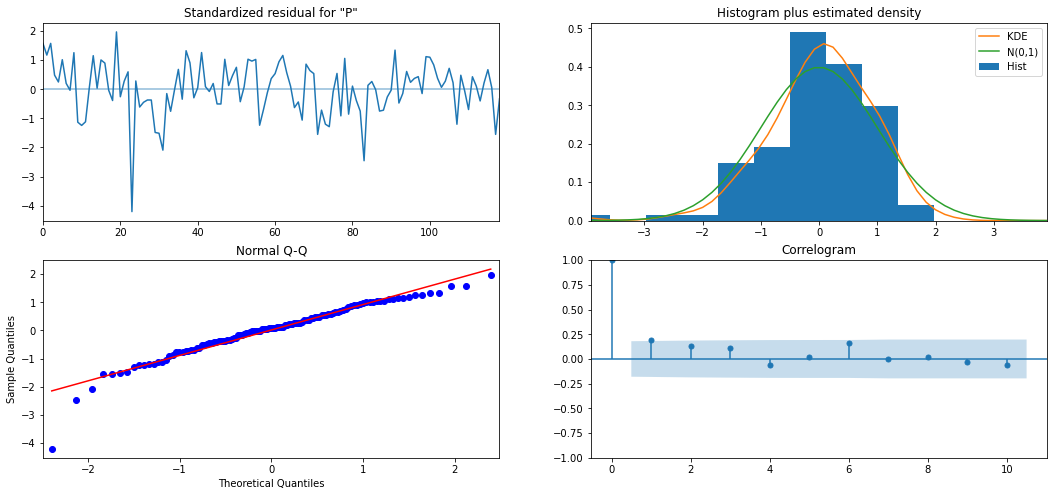

In [70]:
results.plot_diagnostics(figsize = (18,8))
plt.show()


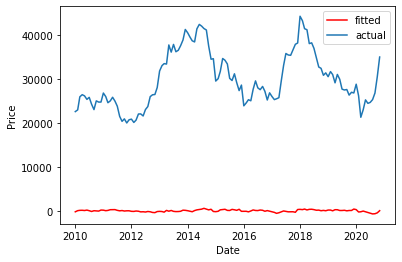

In [57]:
plt.plot(results.fittedvalues.loc['2020-11-01':], color='red')
plt.plot(df.loc['2020-11-01':])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['fitted','actual'])

In [72]:
residuals


NameError: name 'residuals' is not defined

In [56]:
results.fittedvalues.loc['2020-11-01':]

Date
2020-11-01     -5.056192
2020-10-01   -494.842960
2020-09-01   -696.846248
2020-08-01   -739.595665
2020-07-01   -575.630865
                 ...    
2010-05-01     37.135026
2010-04-01     89.100554
2010-03-01     75.068778
2010-02-01      1.874397
2010-01-01   -255.520914
Length: 131, dtype: float64

In [ ]:
df.loc['2020-11-01':]

In [64]:
df - results.fittedvalues

Date
2010-01-01    22850.420914
2010-02-01    22983.125603
2010-03-01    25891.181222
2010-04-01    26364.099446
2010-05-01    26146.074974
                  ...     
2020-08-01    26066.725665
2020-09-01    27534.266248
2020-10-01    31025.532960
2020-11-01    35047.196192
2020-12-01             NaN
Freq: MS, Length: 132, dtype: float64

In [54]:
df.loc['2020-11-01':] - results.fittedvalues.loc['2020-11-01':]

Date
2020-11-01    35047.196192
2020-10-01    31025.532960
2020-09-01    27534.266248
2020-08-01    26066.725665
2020-07-01    25269.360865
                  ...     
2010-05-01    26146.074974
2010-04-01    26364.099446
2010-03-01    25891.181222
2010-02-01    22983.125603
2010-01-01    22850.420914
Length: 131, dtype: float64

In [62]:
results.get_forecast(steps =12)

AttributeError: 'ARIMAResults' object has no attribute 'get_forecast'

In [75]:
df

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2010-05-01    26183.21
2010-04-01    26453.20
2010-03-01    25966.25
2010-02-01    22985.00
2010-01-01    22594.90
Name: Price, Length: 132, dtype: float64

In [63]:
acorr_ljungbox(results.resid,return_df = True)

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,1.069927,0.300962
2,1.117429,0.571944
3,2.078608,0.556253
4,2.715412,0.606520
5,2.825214,0.726911
6,4.909498,0.555472
7,4.914684,0.670374
8,5.126556,0.743968
9,5.448164,0.793623
10,5.853136,0.827447


In [65]:
results.resid

Date
2020-11-01   -5223.523808
2020-10-01   -4016.607040
2020-09-01   -2996.423752
2020-08-01    -770.694335
2020-07-01     -57.769135
                 ...     
2010-05-01     761.934974
2010-04-01     180.889446
2010-03-01    -562.018778
2010-02-01   -2983.124397
2010-01-01    -134.579086
Length: 131, dtype: float64

In [110]:
pred = results.get_prediction(start = pd.to_datetime('2020-12-01'), dynamic = False)
pred_ci = pred.conf_int()


In [111]:
pred_ci

,lower Price,upper Price
Date,,
2020-12-01,12986.392654,46622.373887
2020-11-01,36327.844150,43704.062980
2020-10-01,31242.221042,38618.408305
2020-09-01,26854.330145,34230.484052
2020-08-01,23262.459772,30638.578432
...,...,...
2010-05-01,22440.066603,29564.564310
2010-04-01,22062.330392,29186.819668
2010-03-01,22919.089244,30043.569614


In [80]:
df

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2010-05-01    26183.21
2010-04-01    26453.20
2010-03-01    25966.25
2010-02-01    22985.00
2010-01-01    22594.90
Name: Price, Length: 132, dtype: float64

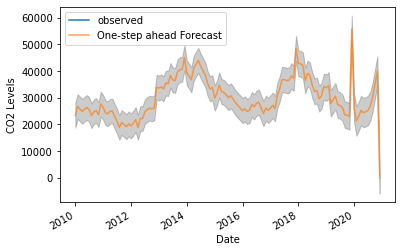

In [81]:
ax = df['1990':].plot(label= 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7)
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()


In [59]:
ARIMA_df = ARIMA(df, order = (1,1,13)).fit(transparams = False)
ARIMA_df.summary()

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                  131
Model:                ARIMA(1, 1, 13)   Log Likelihood               -1169.061
Method:                       css-mle   S.D. of innovations   166887543112.013
Date:                Tue, 08 Jun 2021   AIC                           2370.123
Time:                        14:15:12   BIC                           2416.126
Sample:                             1   HQIC                          2388.816
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5170    230.818     -0.020      0.984    -456.912     447.878
ar.L1.D.Price      0.6983      0.168      4.148      0.000       0.368       1.028
ma.L1.D.Price     -0.5793      0.154     -3.771      0.000      -0.880      -0.278
ma.L2.D.Price     -0.0731      0.111     -0.661      0.509      -0.290       0.144
ma.L3.D.Price      0.0929      0.107      0.870      0.384      -0.116       0.302
ma.L4.D.Price     -0.1128      0.109     -1.031      0.302      -0.327       0.102
ma.L5.D.Price      0.0246      0.108      0.228      0.820      -0.187       0.236
ma.L6.D.Price      0.1796      0.115      1.567      0.117      -0.045       0.404
ma.L7.D.Price     -0.1209      0.111     -1.092      0.275      -0.338       0.096
ma.L8.D.Price      0.0131      0.113      0.116      0.908      -0.209       0.235
ma.L9.D.Price      0.0049      0.116      0.042      0.966      -0.223       0.233
ma.L10.D.Price    -0.0619      0.126     -0.492      0.623      -0.309       0.185
ma.L11.D.Price     0.0285      0.112      0.254      0.800      -0.192       0.249
ma.L12.D.Price     0.1593      0.115      1.389      0.165      -0.065       0.384
ma.L13.D.Price    -0.1245      0.071     -1.741      0.082      -0.265       0.016
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.4320           +0.0000j            1.4320            0.0000
MA.1            -1.1094           -0.3107j            1.1520           -0.4565
MA.2            -1.1094           +0.3107j            1.1520            0.4565
MA.3            -0.8844           -0.7606j            1.1665           -0.3870
MA.4            -0.8844           +0.7606j            1.1665            0.3870
MA.5            -0.2650           -1.1113j            1.1425           -0.2873
MA.6            -0.2650           +1.1113j            1.1425            0.2873
MA.7             0.2582           -1.1065j            1.1362           -0.2135
MA.8             0.2582           +1.1065j            1.1362            0.2135
MA.9             0.8562           -0.8177j            1.1839           -0.1213
MA.10            0.8562           +0.8177j            1.1839            0.1213
MA.11            1.1377           -0.4026j            1.2069           -0.0541
MA.12            1.1377           +0.4026j            1.2069            0.0541
MA.13            1.2934           -0.0000j            1.2934           -0.0000
------------------------------------------------------------------------------
"""

In [61]:
model = ARIMA(df, order = (1,1,1))
results = model.fit(transparams = False)
results.summary()

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1172.618
Method:                       css-mle   S.D. of innovations                nan
Date:                Tue, 08 Jun 2021   AIC                           2353.236
Time:                        14:31:07   BIC                           2364.737
Sample:                             1   HQIC                          2357.909
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0562    213.747     -0.024      0.981    -423.993     413.881
ar.L1.D.Price     0.6866      0.437      1.572      0.116      -0.170       1.543
ma.L1.D.Price    -0.6011      0.452     -1.329      0.184      -1.488       0.285
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4564           +0.0000j            1.4564            0.0000
MA.1            1.6637           +0.0000j            1.6637            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
residuals = pd.DataFrame(results.resid)

<AxesSubplot:title={'center':'Residuals'}, xlabel='Date'>

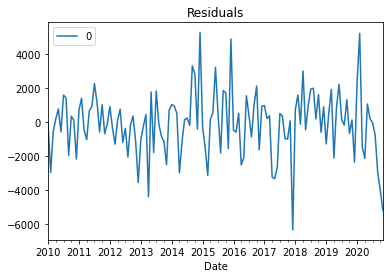

In [72]:

residuals.plot(title= "Residuals")


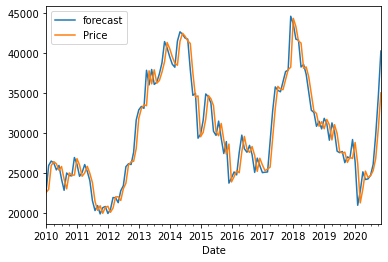

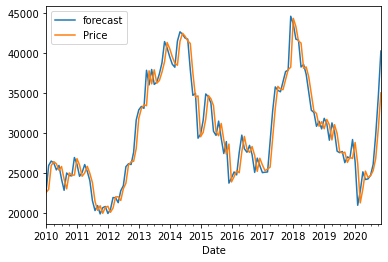

In [73]:
results.plot_predict(dynamic = False)

In [ ]:
mape = np.mean(np.abs())

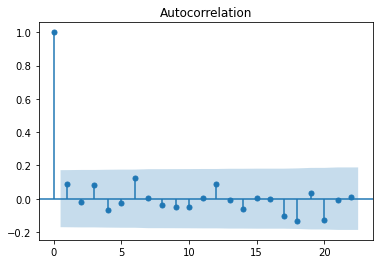

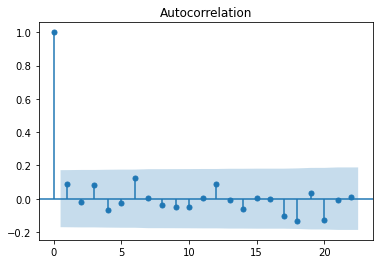

In [85]:
tsaplots.plot_acf(residuals)


In [82]:
results.plot_diagnostics()

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'

NameError: name 'forecast' is not defined

In [94]:
results.forecast(steps = 12)[0]

array([22406.3585311 , 22275.31974391, 22183.76280065, 22119.31443658,
       22073.47905995, 22040.42352321, 22016.14273626, 21997.88676921,
       21983.76749619, 21972.48851343, 21963.15969881, 21955.16988668])

In [90]:
results.predict(12,12)

Date
2019-12-01    367.280037
dtype: float64

<AxesSubplot:xlabel='Date'>

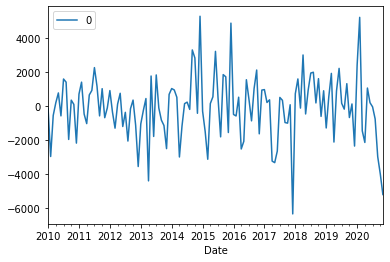

In [92]:
residuals.plot()